# DSGE Modelling with Python


In [1]:
import os, sys
import pandas as pd
import numpy as np

bExist = False
for path in sys.path:
    if "Framework" in path.split("/")[-1]:
        #print(path.split("/")[-1])
        bExist = True

if not bExist:
    path = os.getcwd()
    working_dir = os.path.abspath(os.path.join(path,"../.."))
    sys.path.append(working_dir)
    os.chdir(working_dir)

Read model file and create model object.

In [2]:
from snowdrop.src import driver

# Path to model file
file_path = 'supplements/models/TOY/JLMP98.yaml'
    
# Create model object
model = driver.importModel(fname=file_path)


Monetary policy model example


Model:
------
name: "Monetary policy model example"
file: "supplements/models/TOY/JLMP98.yaml

Non-Linear Model

Transition Equations:
---------------------

 1 	 0.000 :  PDOT = p_pdot1*PDOT(+1) + (1-p_pdot1)*PDOT(-1) + p_pdot2*(g**2/(g-Y) - g) + p_pdot3*(g**2/(g-Y(-1)) - g) + epdot
 2 	 0.000 :  RR = RS - p_pdot1*PDOT(+1) - (1-p_pdot1)*PDOT(-1) + err
 3 	 0.000 :  RS = p_rs1*PDOT + Y + ers + exo
 4 	 0.000 :  Y = p_y1*Y(-1) - p_y2*RR - p_y3*RR(-1) + ey





Set model parameters. Specify shocks and exogenous variables. Run simulations.

LBJ solver
Dense matrices algebra
Using CPU cores


Elapsed time: 0.01 (seconds)
Number of iterations: 7; error: 6.2e-13

Plotting Decomposition of Endogenous Variables


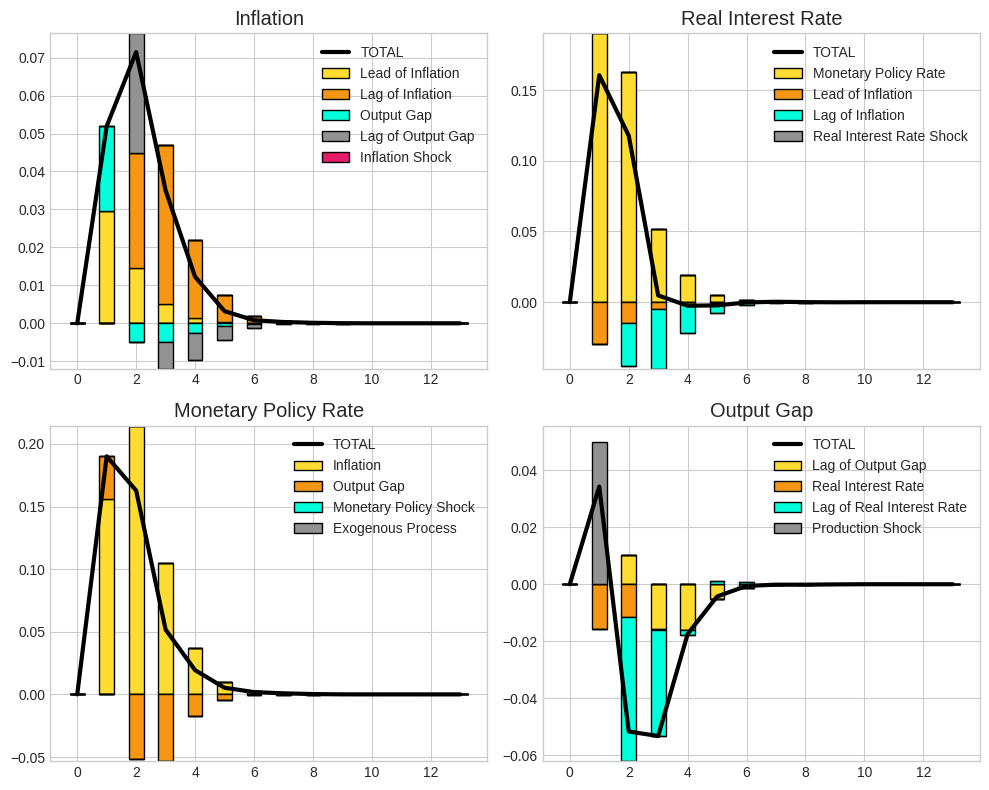

            PDOT        RR            RS         Y
0   0.000000e+00  0.000000  0.000000e+00  0.000000
1   5.193726e-02  0.160494  1.900834e-01  0.034272
2   7.147254e-02  0.117803  1.627360e-01 -0.051682
3   3.501955e-02  0.004804  5.176883e-02 -0.053290
4   1.227568e-02 -0.002488  1.935756e-02 -0.017469
5   3.197901e-03 -0.002242  5.286354e-03 -0.004307
6   8.085704e-04 -0.000175  1.839658e-03 -0.000586
7   3.402839e-04  0.000335  8.650917e-04 -0.000156
8   1.370358e-04  0.000044  2.541097e-04 -0.000157
9   2.694746e-05 -0.000056  2.490415e-05 -0.000056
10  1.905441e-06 -0.000010  7.355877e-06  0.000002
11  2.932882e-06  0.000009  1.141126e-05  0.000003
12  2.057154e-06  0.000002  3.795729e-06 -0.000002
13  2.004481e-07 -0.000002 -5.849961e-07 -0.000001


In [3]:
# Model parameters
cal = {'g':0.049,'p_pdot1':0.414,'p_pdot2': 0.196,'p_pdot3': 0.276,
       'p_rs1':3,'p_y1':0.304,'p_y2':0.098,'p_y3':0.315}
model.calibration['parameters'] = list(cal.values())

# Shocks
model.options["periods"] = [1]
model.options["shock_values"] = [0.05]

# Exogenous variables. Revision of Monetary Policy Rate.
from snowdrop.src.utils.util import getExogenousSeries

exog_data = {'ers': pd.Series([0,0,0,-0.05,0],[1,2,3,4,5])}
#exog_data = {'ers': pd.Series([0]*5,[1,2,3,4,5])}
model.symbolic.exog_data = exog_data     
model.calibration["exogenous"] = getExogenousSeries(model)

# List of variables for which decomposition plots are produced
decomp = ['PDOT','RR','RS','Y']

# Run simulations
y,rng_date = driver.run(model=model,decomp_variables=decomp,Output=False,Plot=True)
df = pd.DataFrame(y[:len(rng_date)],rng_date)
df.columns = model.symbols["variables"]
print(df)